In [ ]:
#Employee Work Hours Analysis with Anomaly Detection and Visualization


In [1]:
import numpy as np
import pandas as pd

In [4]:
#Create 30 employee IDs
employee_ids = [f'EMP{str(i).zfill(3)}' for i in range(1, 31)]
employee_ids  # Display the list


['EMP001',
 'EMP002',
 'EMP003',
 'EMP004',
 'EMP005',
 'EMP006',
 'EMP007',
 'EMP008',
 'EMP009',
 'EMP010',
 'EMP011',
 'EMP012',
 'EMP013',
 'EMP014',
 'EMP015',
 'EMP016',
 'EMP017',
 'EMP018',
 'EMP019',
 'EMP020',
 'EMP021',
 'EMP022',
 'EMP023',
 'EMP024',
 'EMP025',
 'EMP026',
 'EMP027',
 'EMP028',
 'EMP029',
 'EMP030']

In [5]:
# Simulate working hours for each employee for 7 days (total 210 entries)
np.random.seed(42)  # For reproducible results

In [6]:
data = {
    "EmployeeID": np.repeat(employee_ids, 7),  # 30 employees × 7 days
    "Day": list(range(1, 8)) * 30,             # Days 1 to 7
    "WorkingHours": np.random.randint(4, 11, size=30 * 7)  # Random hours between 4 and 10
}

In [7]:
# Create the DataFrame
df = pd.DataFrame(data)
df.head(10)  # Show first 10 rows

,EmployeeID,Day,WorkingHours
0,EMP001,1,10
1,EMP001,2,7
2,EMP001,3,8
3,EMP001,4,10
4,EMP001,5,6
5,EMP001,6,8
6,EMP001,7,8
7,EMP002,1,10
8,EMP002,2,5
9,EMP002,3,6


In [9]:
# Check shape of the DataFrame
print("Shape of dataset:", df.shape)

# Summary statistics of working hours
print("\nSummary statistics:\n", df["WorkingHours"].describe())

# Check for any missing values
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (210, 3)

Summary statistics:
 count    210.000000
mean       7.180952
std        1.979710
min        4.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: WorkingHours, dtype: float64

Missing values:
 EmployeeID      0
Day             0
WorkingHours    0
dtype: int64


In [10]:
# Group by EmployeeID to calculate Total, Average, Min, and Max working hours
employee_summary = df.groupby("EmployeeID")["WorkingHours"].agg(
    TotalHours='sum',
    AverageHours='mean',
    MinHours='min',
    MaxHours='max'
).reset_index()

# Show summary
employee_summary.head()


,EmployeeID,TotalHours,AverageHours,MinHours,MaxHours
0,EMP001,57,8.142857,6,10
1,EMP002,51,7.285714,5,10
2,EMP003,51,7.285714,5,9
3,EMP004,45,6.428571,4,9
4,EMP005,44,6.285714,4,9


In [11]:
# Detect employees with average working hours < 5 or > 9 (as anomalies)
anomalies = employee_summary[
    (employee_summary["AverageHours"] < 5) |
    (employee_summary["AverageHours"] > 9)
]

In [12]:
# Show anomalies
print("Anomalies Detected:\n")
print(anomalies)

Anomalies Detected:

Empty DataFrame
Columns: [EmployeeID, TotalHours, AverageHours, MinHours, MaxHours]
Index: []


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


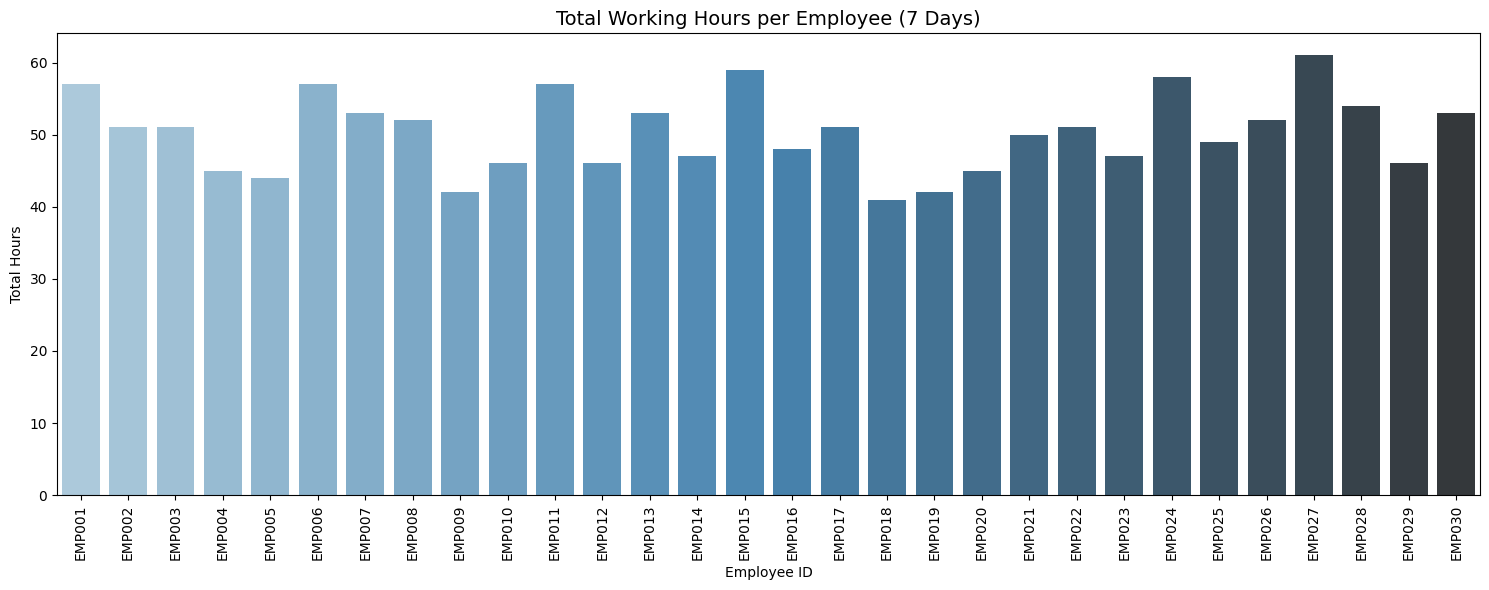

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(
    data=employee_summary.assign(Hue=employee_summary["EmployeeID"]),  # temporary hue column
    x="EmployeeID",
    y="TotalHours",
    hue="Hue",                      # set hue as x for consistent palette use
    palette="Blues_d",
    legend=False                    # hide the legend
)
plt.xticks(rotation=90)
plt.title("Total Working Hours per Employee (7 Days)", fontsize=14)
plt.xlabel("Employee ID")
plt.ylabel("Total Hours")
plt.tight_layout()
plt.show()


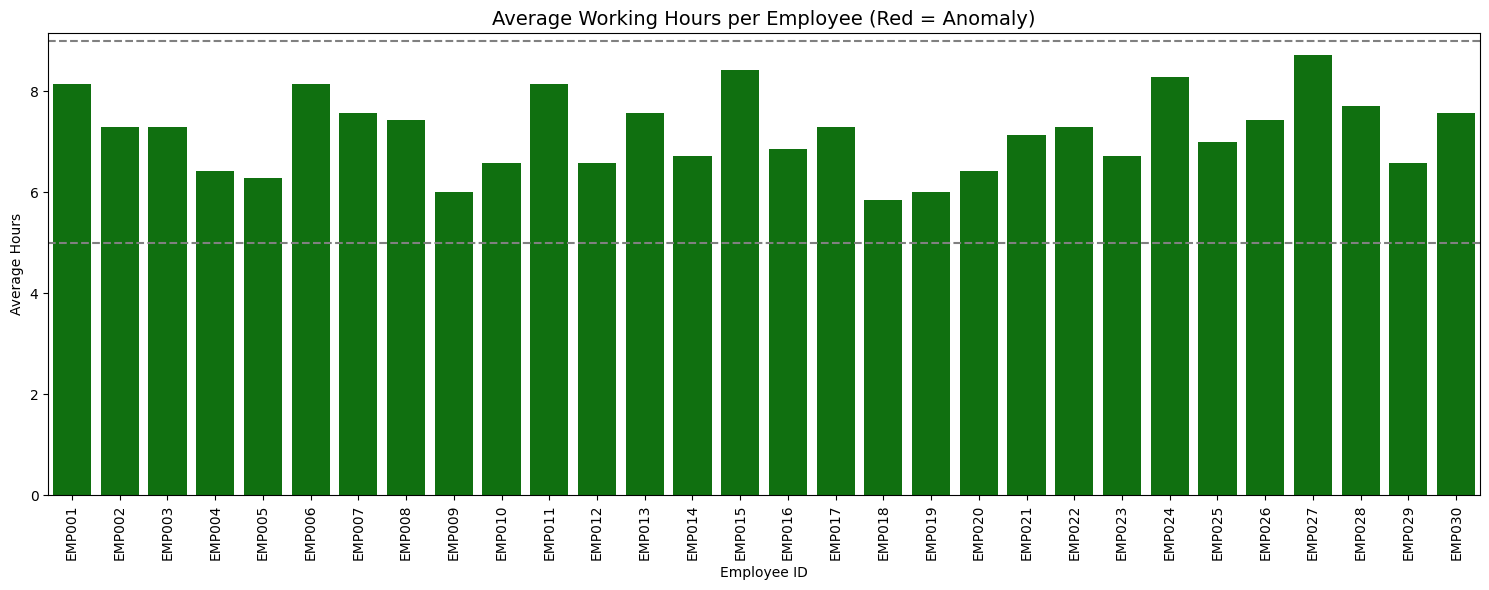

In [18]:
# Create a new column for color
employee_summary['Color'] = employee_summary['EmployeeID'].apply(
    lambda emp: 'red' if emp in anomalies['EmployeeID'].values else 'green'
)

plt.figure(figsize=(15,6))
sns.barplot(
    data=employee_summary,
    x="EmployeeID",
    y="AverageHours",
    hue="Color",           # use color as hue
    palette={"red": "red", "green": "green"},
    dodge=False,           # to keep bars in one position
    legend=False           # turn off the legend
)
plt.xticks(rotation=90)
plt.title("Average Working Hours per Employee (Red = Anomaly)", fontsize=14)
plt.xlabel("Employee ID")
plt.ylabel("Average Hours")
plt.axhline(5, color='gray', linestyle='--', label='Lower Threshold')
plt.axhline(9, color='gray', linestyle='--', label='Upper Threshold')
plt.tight_layout()
plt.show()
